<a href="https://colab.research.google.com/github/BaranikumarNagarajan/BaranikumarNagarajan/blob/main/Copy_of_EndtoEndLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing (2).csv


In [ ]:
data = pd.read_csv('/content/Housing.csv')

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


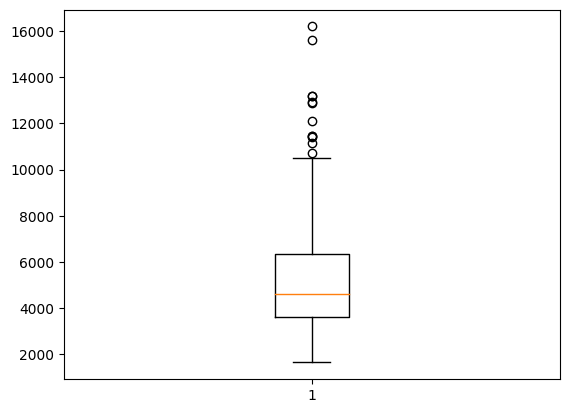

In [ ]:
plt.boxplot(data['area'])
plt.show()

In [ ]:
#IQR
# remove the outliers
# outliers replace with mean/median

Categorical Data:

    ==> Label Encoding

    ==>One-hot encoding

    ==> Target Encoding



In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [ ]:
data['mainroad'] = encoder.fit_transform(data['mainroad'])

data['guestroom'] = encoder.fit_transform(data['guestroom'])
data['basement'] = encoder.fit_transform(data['basement'])
data['hotwaterheating'] = encoder.fit_transform(data['hotwaterheating'])


In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,no,0,no,furnished


In [ ]:
data['airconditioning'] = encoder.fit_transform(data['airconditioning'])
data['prefarea'] = encoder.fit_transform(data['prefarea'])

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
furn = pd.get_dummies(data['furnishingstatus'],dtype=int,drop_first=True)

In [ ]:
furn.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
housing = pd.concat([data,furn],axis=1)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [ ]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [ ]:
#null values

housing.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
semi-furnished     0
unfurnished        0
dtype: int64

In [ ]:
'''
remove the null values
replace the null values -->median/mean

housing['area'].interpolate(method='linear',limit_direction='forward',inplace=True)
housing['area'].fillna(housing['area'].median(),inplace=True)



'''

**Feature Engineering**

existing dataframe ==> new columns

In [ ]:
housing['area_bedroom'] = housing['area']/housing['bedrooms']

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_bedroom
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0


Correlation

In [ ]:
corr_out = housing.corr()

In [ ]:
corr_out

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_bedroom
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587,0.244809
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278,0.805610
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252,-0.397259
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107,-0.052352
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972,-0.178942
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123,0.249829
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023,0.054312
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935,-0.017034
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194,-0.021634
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086,0.096830


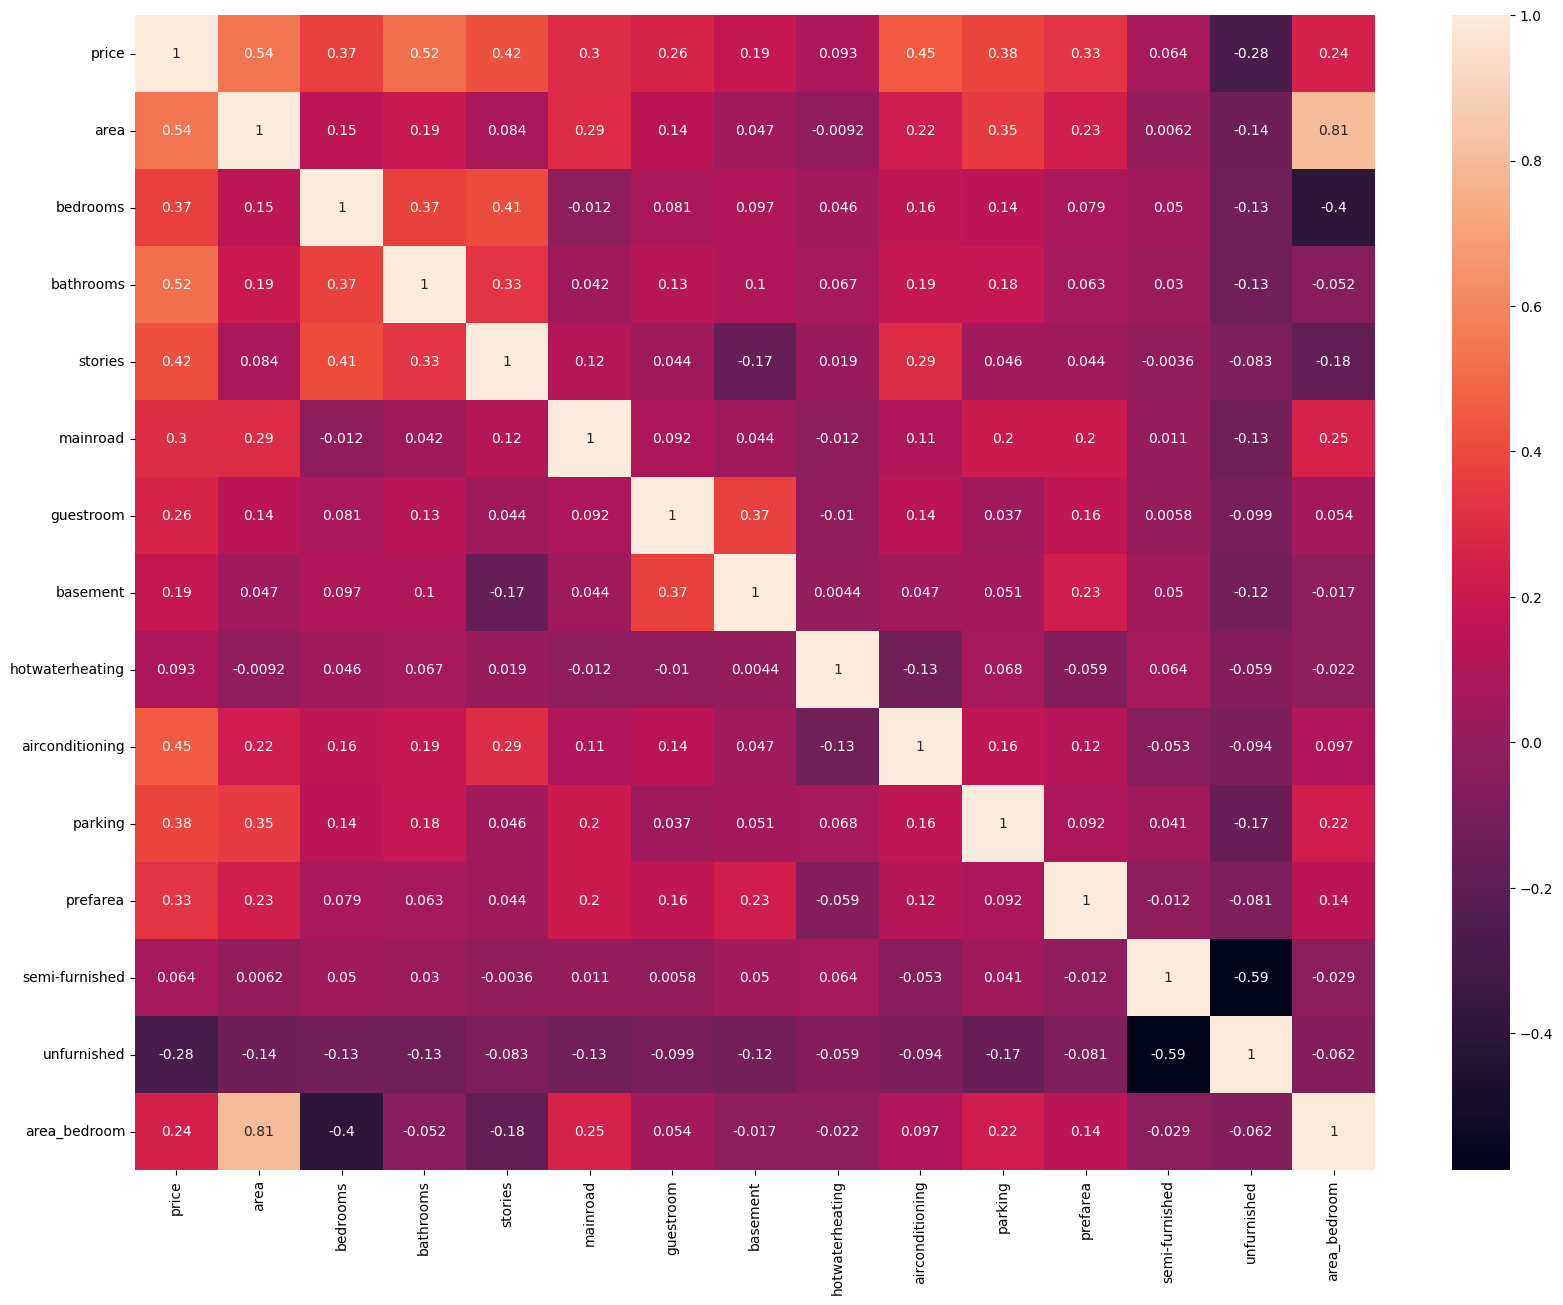

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(corr_out,annot=True)
plt.show()

In [ ]:
#multicollinearity ==>

# base model

X = housing.drop(['price'],axis=1)
Y = housing['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
#train and test data split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(scaled_X,Y,test_size=0.25,random_state=40)

In [ ]:
X_train.shape

(408, 14)

In [ ]:
Y_train.shape

(408,)

In [ ]:
X_test.shape

(137, 14)

In [ ]:
Y_test.shape

(137,)

In [ ]:
#BAse model

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_test_predict = model1.predict(X_test)

In [ ]:
#Y_test vs Y_test_predict

from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_test_predict))
print(rmse)

1315545.3861634436


In [ ]:
score = r2_score(Y_test,Y_test_predict)

In [ ]:
print(score)

0.6199382298199079


In [ ]:
Y_train_predict = model1.predict(X_train)

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_train,Y_train_predict))
print(rmse)

958879.0152052343


In [ ]:
train_score = r2_score(Y_train,Y_train_predict)
print(train_score)


0.7059447428791388
